<a href="https://colab.research.google.com/github/trahul1125/DataScience-Notes/blob/main/LogReg%26KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LOGISTIC REGRESSION



THEORY:
*   Solves classification problems
*   It helps to predict discrete categories
*   We get a logistic reg curve that only goes between 0 and 1
*   Sigmoid function[1/1 + e^-z] takes in any values and outputs it between 0 and 1. Whatever value you put in for z doesnt matter. It will always be between 0 and 1
*   We can set a cutoff point at 0.5 and we can say that any value below 0.5 can be considered negative or in the 0 class. Any value above 1 is considered postive or in the 1 class
*   You can always use a confusion matrix to evaluate our model







In [2]:
#CODING LOG REG


import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('/content/train.csv')

test = pd.read_csv('/content/test.csv')




In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


FIRST WE SHALL DO IS EDA

1) CHECK FOR ANY NULL VALUES. THIS CAN BE DONE USING THE ISNULL FUNCTION AS WELL AS A SNS HEATMAP

2)

<Axes: >

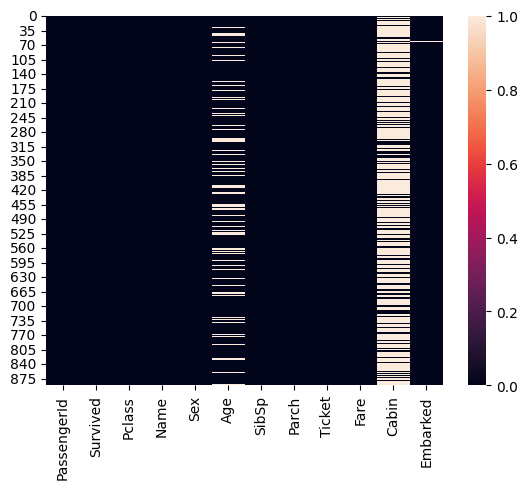

In [6]:
sns.heatmap(train.isnull())


#the dashed lines indicate severe presence of null values in our dataset

<Axes: xlabel='Survived', ylabel='count'>

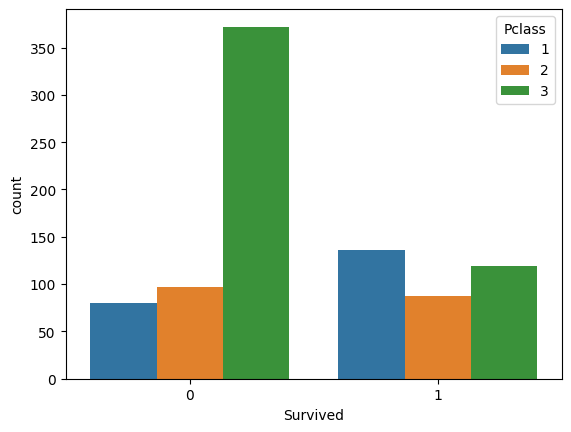

In [7]:
#just use graphs to visualize some basic facts

sns.countplot(x='Survived',data=train,hue='Pclass')

<ipython-input-8-124b9fb325d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

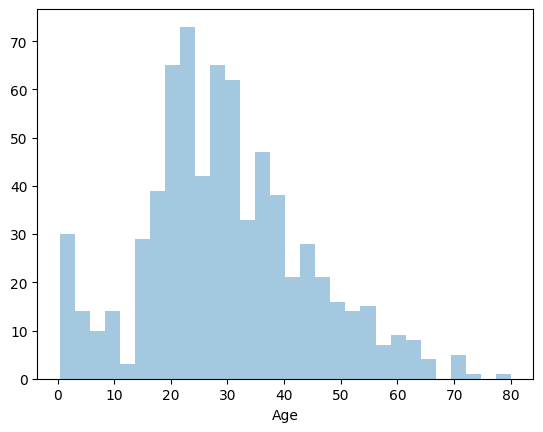

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

#to get an age distribution of passengers on the titanic

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

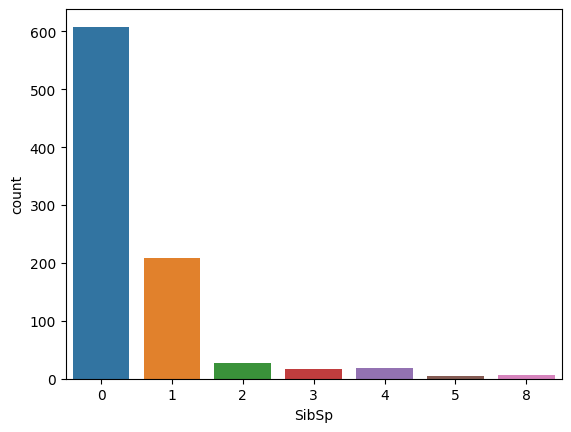

In [10]:
sns.countplot(x='SibSp',data=train)

<Axes: ylabel='Frequency'>

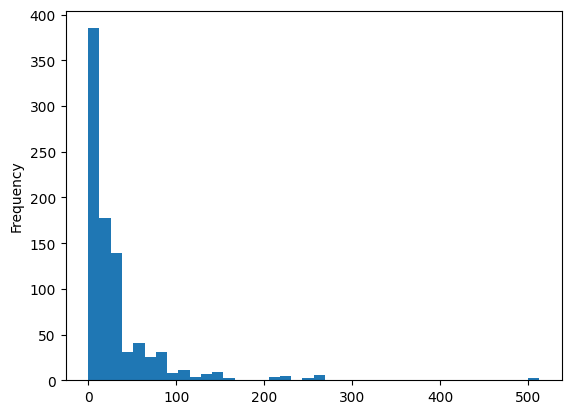

In [11]:
train['Fare'].plot.hist(bins=40)

In [12]:
#end of EDA



<Axes: xlabel='Pclass', ylabel='Age'>

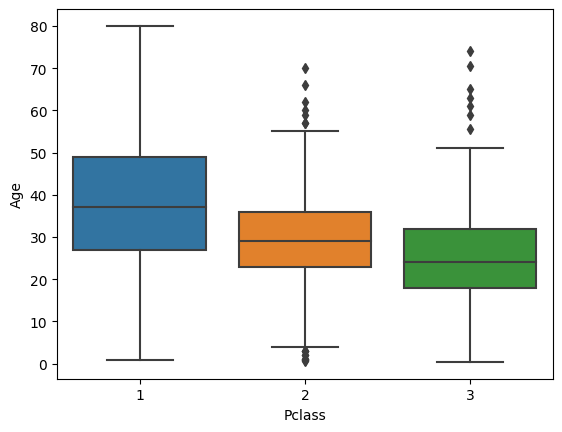

In [13]:
#time to clean the data

sns.boxplot(x='Pclass',y='Age',data=train)

In [14]:
#cleaning up data in the age column

def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
      return Age

In [15]:
train['Age']  = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

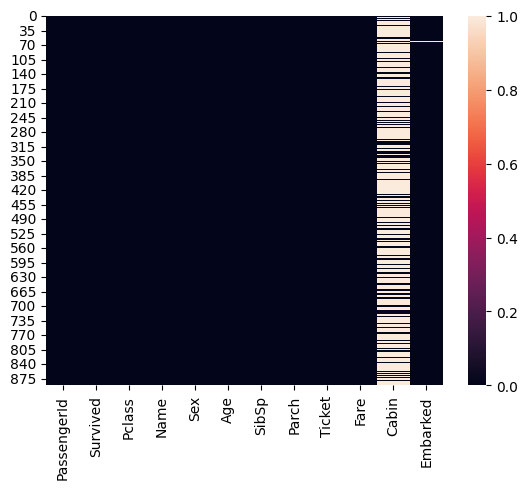

In [16]:
sns.heatmap(train.isnull())

In [17]:
train.drop('Cabin',axis=1,inplace=True)

#we drop the entire cabin column as it doesnt contri anything

In [18]:
train.dropna(inplace=True)

<Axes: >

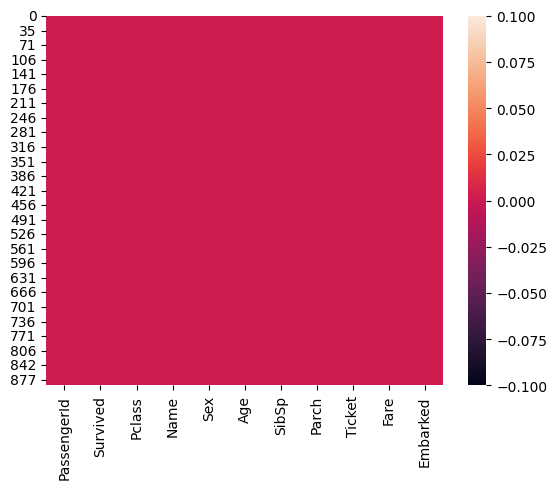

In [19]:
sns.heatmap(train.isnull())

In [20]:
# we now have to convert categorical features to numeric
#sex is given like male and female

In [21]:
sex = pd.get_dummies(train['Sex'],drop_first =True)

#converts categorical to numeric .But it leads to multi-collinearity where 1 col becomes a perfect predictor of the other

In [22]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train = pd.concat([train,sex,embark],axis=1)



In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [25]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [26]:
train.drop(['Ticket','Name'],axis=1,inplace=True)

WE DROPPED ALL COLUMNS WHOSE DATATYPE WAS CHAR AS ML ALGOS ONLY USE NUMBERS

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
#WE SEE THAT PASSENGERID JUST FUNCTIONS LIKE OUR INDEX AND SO WE DONT NEED IT


train.drop(['PassengerId'],axis=1,inplace=True)

In [29]:
#NOW WE CREATE AND TRAIN OUR ML MODEL


test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
x=train.drop('Survived',axis=1)

y=train['Survived']

#y is the column of label we are actually trying to predict

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,
                                                 random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = logmodel.predict(x_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       174
           1       0.83      0.68      0.74       120

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [39]:
#KNN

KNN THEORY
*  Classification Algorithm
*  Steps:
1) Calculate the distance from x to all points in your data.
2) Sort the points on the basis of increasing distance from x.
3) Predict the majority label of the "k" closest points.

*   Value of K is very important as it influences what class a new point is assigned to.
*   Sometimes larger K values lead to bias in our data leading us to mislabel some points

*   Simple with training being trivial
*   High prediction cost and doesn't work well with categorical and high dimensional data.






In [40]:
#necessary imports

import pandas as pd
import numpy as np

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#if you use a jupyter notebook use the above command

In [42]:
df = pd.read_csv('/content/Classified Data.csv',index_col=0)

#index_col is used to remove that first column that didnt contribute anything
#and had same function as our traditional index

In [43]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [44]:
# we want to standardize all values and bring them into one range for ease
#to the machine learning model.

from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

# we dont want to standardize target col so we drop it momentarily

StandardScaler()

In [47]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

#performs the standardization

In [48]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [49]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

#end of data normalization/standardization

In [50]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df_feat

y = df['TARGET CLASS']

In [57]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state = 101)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [63]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [66]:
#how to choose a better/optimal k value


error_rate = []
#here we are checking for every k val from 1 to 40
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))




#pred_i != y_test. This denotes the avg of where my predictions were not equal
#to actual test values

Text(0, 0.5, 'Error Rate')

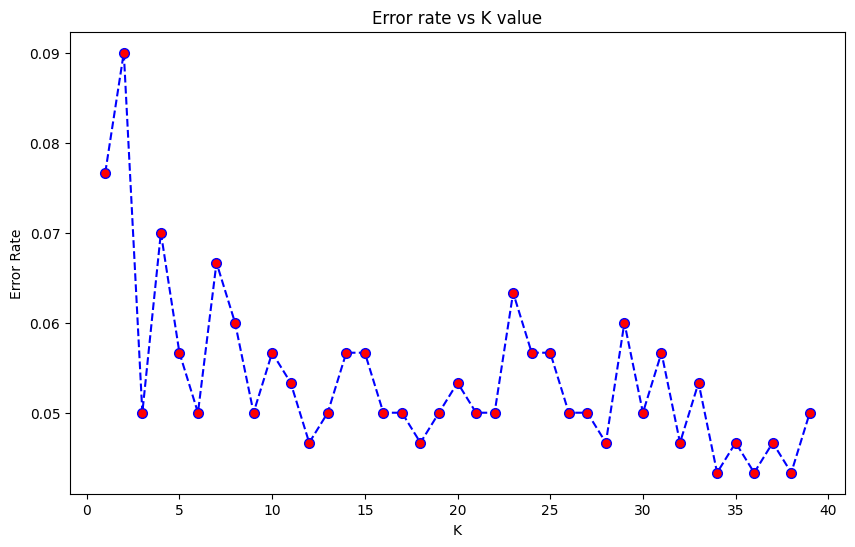

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=7)


plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see have a higher error rate with a lower K value.

As K increases our error rates starts to decrease